[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/juansensio/elcursodeia-code/blob/master/dl/ejercicios/03_fundamentos.ipynb)

# Ejercicio: Fundamentos del Deep Learning

En este ejercicio tendrás que implementar tu propio mini-framework para entrenar MLPs con el algoritmo de *Backpropagation*, inspirado en [Pytorch](https://pytorch.org/), pero sin usar Pytorch, solo Numpy.

Tu framework debería funcionar con la siguiente API:

```python
D_in, H, D_out = 2, 3, 2

# definir la estructura de la MLP (número de capas, número de neuronas por capa, funciones de activación ...
net = Net([
    Linear(D_in, H),
    ReLU(),
    Linear(H, D_out)
])

# definir el optimizador y la función de pérdida
optimizer = SGD(net, lr=0.1)
loss = CrossEntropy(net)

# bucle de entrenamiento. 
epochs = 100
for e in range(epochs):
  for _x, _y in zip(x, y):
    # Calcula las salidas del modelo. 
    y_pred = net.forward(_x) 
    # Calcula la función de pérdida   
    loss.compute(y_pred, _y)
    # Calcula los gradientes de la pérdida con respecto a los parámetros del modelo
    loss.backward()    
    # Actualiza los parámetros del modelo
    optimizer.update()
```


## Capas

Llamamos *capas*, o *layers*, a las diferentes capas que podemos insertar en una red neuronal (por ejemplo, una capa de perceptrón, funciones de activación y más).

Completa las siguientes capas.

In [20]:
import numpy as np

# Layers

class ReLU():
    def __init__(self):
        pass
    
    def forward(self, x):
        pass
    
    def backward(self, grad_output):
       pass
      
class Linear():
    def __init__(self, d_in, d_out):
        pass
    
    def forward(self, x):
        pass
    
    def backward(self, grad_output):
        pass

## El Optimizador

El optimizador se encargará de actualizar los pesos de tu red neuronal.

In [21]:
# optimizer

class SGD():
  def __init__(self, net, lr):
    pass
    
  def update(self):
    pass

## La función de pérdida

La función de pérdida calculará el error de tu red neuronal y lanzará el cálculo de los gradientes del error con respecto a todos los parámetros entrenables.

In [22]:
# loss

class CrossEntropy():
  def __init__(self, net):
    pass
  
  def compute(self, output, target):
    pass
  
  def grad_crossentropy(self):
    pass
  
  def backward(self):
    pass

## El MLP

La clase MLP consistirá en un conjunto de capas que trabajarán juntas.

In [23]:
# MLP

class Net:
  def __init__(self, layers):
    pass
  
  def forward(self, x):
    pass
  
  def backward(self, grad):
    pass

## Entrenamiento en MNIST

Valida que tu framework funciona bien con el conjunto de datos MNIST.

In [11]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"].values, mnist["target"].values.astype(int)

In [15]:
from sklearn.model_selection import train_test_split

# keep a subsample and normalize
X_sub, y_sub = X[:2000] / 255., y[:2000]

# split in train and test
X_train, X_test, y_train, y_test = train_test_split(X_sub, y_sub, test_size=0.2, shuffle=True)

print(X_train.shape, X_test.shape)

(1600, 784) (400, 784)


In [24]:
D_in, H, D_out = 784, 100, 10

net = Net([
    Linear(D_in, H),
    ReLU(),
    Linear(H, D_out),
])

optimizer = SGD(net, lr=0.01)
loss = CrossEntropy(net)

epochs = 10
lt, lv, acc = [], [], []
for e in range(epochs):
  l = []
  for img, label in zip(X_train, y_train):
    img = img[None,:]
    y_pred = net.forward(img)    
    l.append(loss.compute(y_pred, label))
    loss.backward()    
    optimizer.update()
  l2, correct = [], 0
  for img, label in zip(X_test, y_test):
    img = img[None,:]
    y_pred = net.forward(img) 
    l2.append(loss.compute(y_pred, label))
    correct += np.argmax(y_pred) == label
  print(f'Epoch: {e+1}, Loss: [{np.mean(l):.4f} {np.mean(l2):.4f}], Acc: {correct}/{len(X_test)} ({100*correct/len(X_test):.3f}%)')
  lt.append(np.mean(l))
  lv.append(np.mean(l2))
  acc.append(correct/len(X_test))

TypeError: unsupported operand type(s) for +: 'NoneType' and 'NoneType'

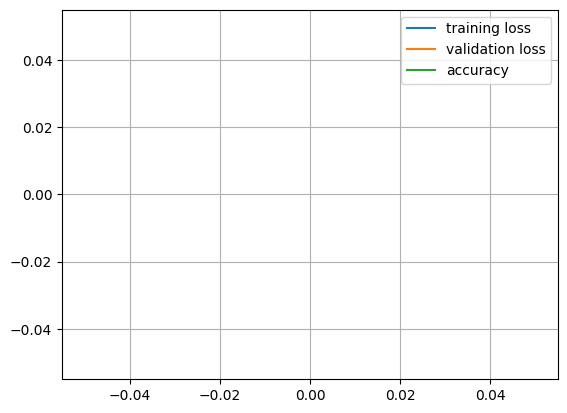

In [25]:
import matplotlib.pyplot as plt

plt.plot(lt)
plt.plot(lv)
plt.plot(acc)
plt.grid()
plt.legend(["training loss", "validation loss", "accuracy"])
plt.show()

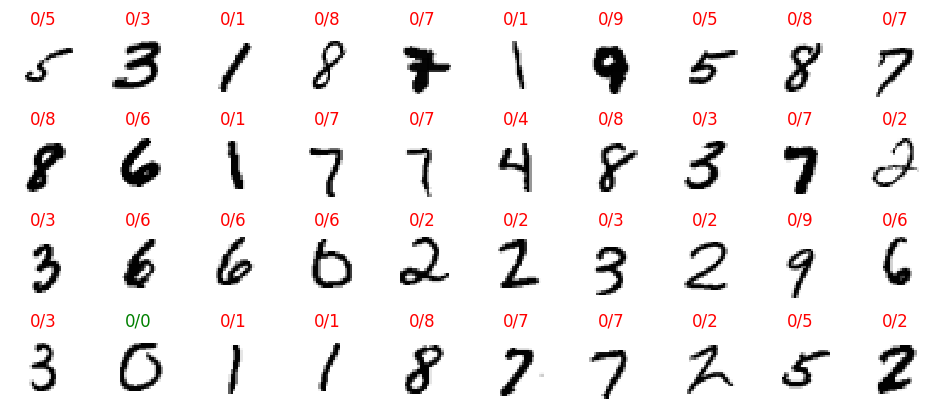

In [26]:
import random

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        ix = random.randint(0, len(X_test)-1)
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_test[ix].reshape(28,28), cmap="binary", interpolation="nearest")
        plt.axis('off')
        y_pred = net.forward(X_test[ix][None,:])
        y_pred = np.argmax(y_pred)
        plt.title(f'{y_pred}/{y_test[ix]}', color="green" if y_test[ix] == y_pred else "red", fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()